In [1]:
from risk_management.risk_checker import RiskChecker
from utils.plots import ChartPlotter
from core.strategy_loader import load_all_strategies
from indicators.all_indicators import calculate_volume_heatmap
from indicators.support_resistance import SupportResistancePivotIndicator
from indicators.ema import EMAIndicator
from indicators.vol_heatmap import VolumeHeatmapIndicator
from indicators.sr_volume_boxes import SupportResistanceVolumeBoxesIndicator
from IPython.display import display, Markdown
import pandas as pd

from data import DataManager
from utils import compute_sr_boxes, plot_sr_boxes
load_all_strategies()

C:\Users\tzhang\PycharmProjects\taoquant\.venv\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
# ------------------------------------------------------------------
# Load 15m OHLCV for the past 30 days from OKX
# ------------------------------------------------------------------
manager = DataManager()
end_time = pd.Timestamp.utcnow().floor("min")
start_time = end_time - pd.Timedelta(days=200)
symbol = 'BTCUSDT'
print(f"Getting {symbol} data from {start_time} to {end_time}")
btc_15m = manager.get_klines(
    symbol=symbol,
    timeframe="15m",
    start=start_time,
    end=end_time,
    source="okx",
)

# btc_4h = manager.get_klines(
#     symbol=symbol,
#     timeframe="4h",
#     start=start_time,
#     end=end_time,
#     source="okx",
# )

btc_1d = manager.get_klines(
    symbol=symbol,
    timeframe="1d",
    start=start_time,
    end=end_time,
    source="okx",
    #use_cache=False,
)

Getting BTCUSDT data from 2025-04-24 18:52:00+00:00 to 2025-11-10 18:52:00+00:00


C:\Users\tzhang\PycharmProjects\taoquant\indicators\sr_volume_boxes.py:80: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  atr_series = atr_series.fillna(method="bfill").fillna(method="ffill")


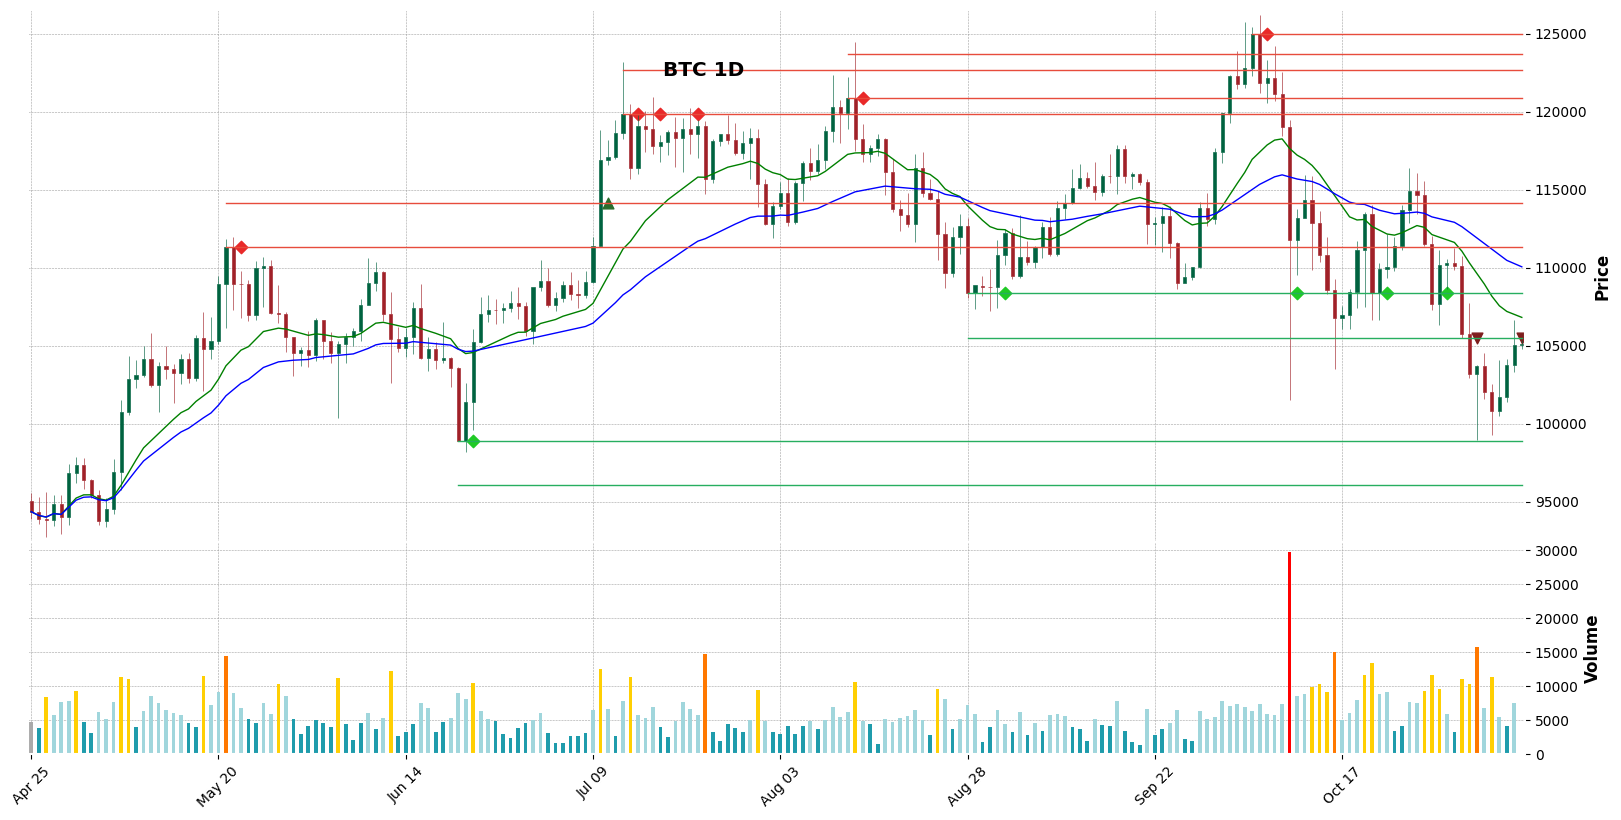

In [3]:
plotter = ChartPlotter([
  EMAIndicator(spans=[20, 50]),
  VolumeHeatmapIndicator(),
  SupportResistanceVolumeBoxesIndicator(lookback=20, volume_length=2, box_width_factor=1.0),
])
plotter.plot(btc_1d, title="BTC 1D")

C:\Users\tzhang\PycharmProjects\taoquant\indicators\sr_volume_boxes.py:80: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  atr_series = atr_series.fillna(method="bfill").fillna(method="ffill")


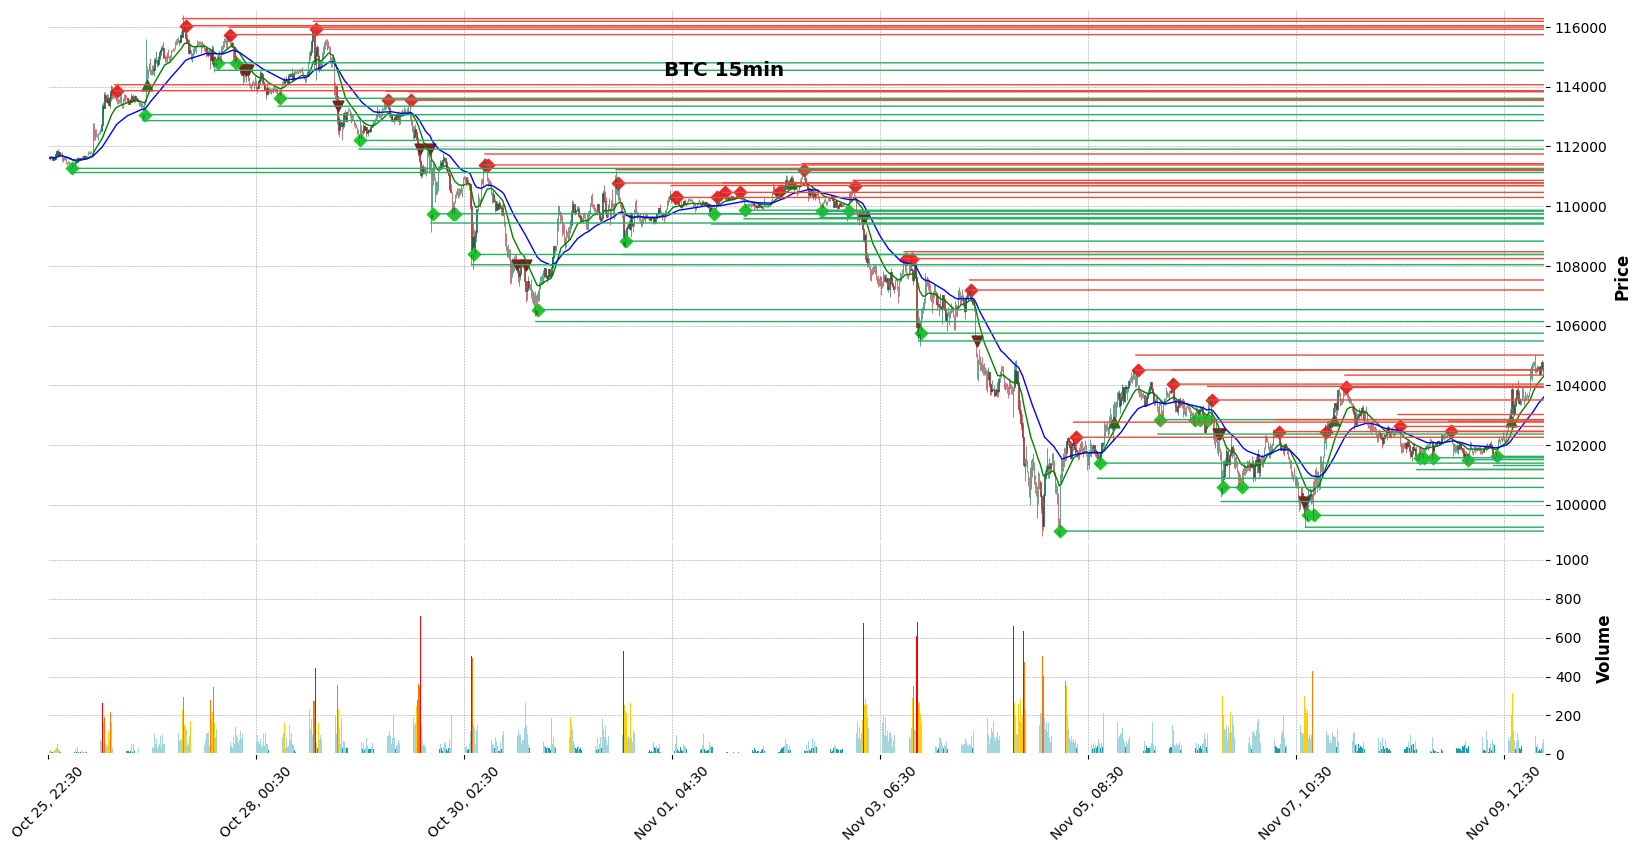

In [4]:
plotter.plot(btc_15m[1000:], title="BTC 15min")